In [178]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

# The task is to find optimum of a 10-dimensional sphere function using (1+1)-ES
We see that (1+1)-ES with adaptive mutation variance converges much faster compared to vanilla (1+1)-ES. This is probably to a better balance between exploration and exploitation which is set by state of the solution, i.e. by real needs of algorithm.
It seems that with $c=0.8$ algorithm converges faster than with $c=0.6$ or $c=0.98$. Similarly, $desirable\_success\_rate=0.2$ allows algorithm to converge faster than values $0.01$ or $0.4$. With value $0.7$ it is just stuck at a local optimum.

In [65]:
def sphere_function(x, rng=(-5.12, 5.12)):
    if np.any((rng[0] > x) | (x > rng[1])):
        # x is out of range - return infitinity cost
        return np.inf
    else:
        return np.sum(x**2)

In [82]:
NUM_GENERATIONS = 500

def es1plus1(mutation_variance, adaptive=False, gen_window=10, c=0.817, desirable_success_rate=0.2):
    # randomly initialize the first individual
    x0 = (np.random.random(size=(10,)) - 0.5) * 10.24
    costs = []
    variances = []
    mutation_results = []
    for i in range(NUM_GENERATIONS):
        # save current generation's cost and mutation variance
        # for evolution visualization
        costs.append(sphere_function(x0))
        variances.append(mutation_variance)
        # generate random mutation vector
        r = np.random.randn(10) * (mutation_variance ** 0.5)
        # create a child
        x1 = x0 + r
        # if child is more fit - replace the parent
        if sphere_function(x1) < sphere_function(x0):
            x0 = x1
            # indicate a success of this mutation
            mutation_results = [1] + mutation_results[:gen_window-1]
        else:
            # indicate a failure of this mutation
            mutation_results = [0] + mutation_results[:gen_window-1]
            
        # if we chose to adapt the mutation variance
        if adaptive:
            success_rate = np.mean(mutation_results)
            if success_rate < desirable_success_rate:
                # if success rate is too low - 
                # it means that mutations are too big and we need to decrease mutation variance
                # (remember, c < 1)
                mutation_variance *= c 
            elif success_rate > desirable_success_rate:
                # if success rate is too big -
                # we have too many small adjustments around current point,
                # but almost no exploration.
                # So mutation variance should be increased 
                # (remember, c < 1)
                mutation_variance /= c

    costs = np.array(costs)
    variances = np.array(variances)
    
    return costs, variances

### No adaptation

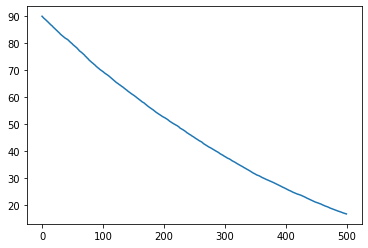

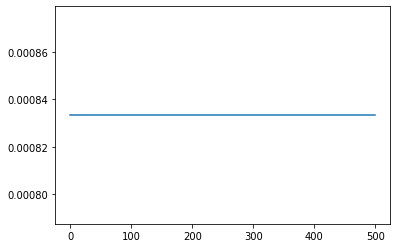

In [70]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
# Run 50 simulations and average the results
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

### With adaptation - try different values of $c$

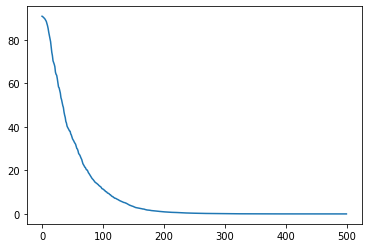

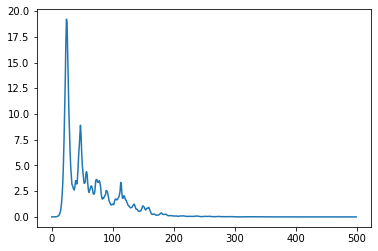

In [78]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, c=0.6)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

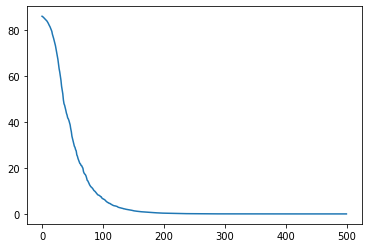

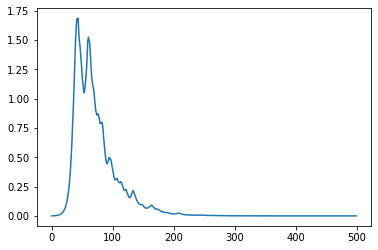

In [79]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, c=0.8)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

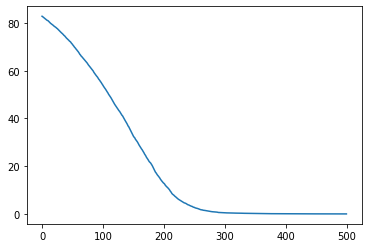

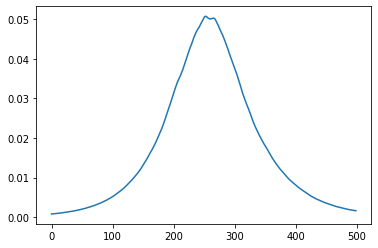

In [81]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, c=0.98)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

### With adaptation - try different values of desirable success_rate

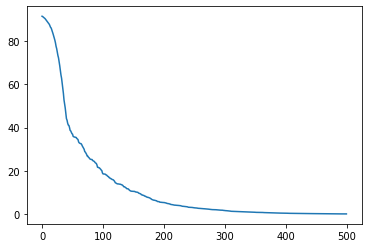

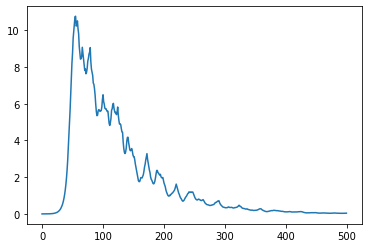

In [83]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, desirable_success_rate=0.01)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

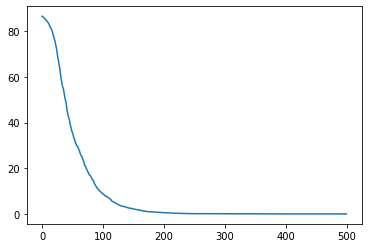

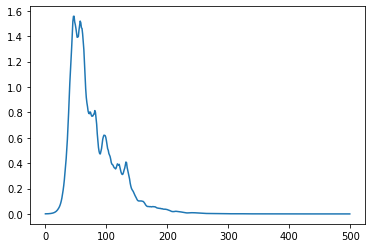

In [84]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, desirable_success_rate=0.2)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

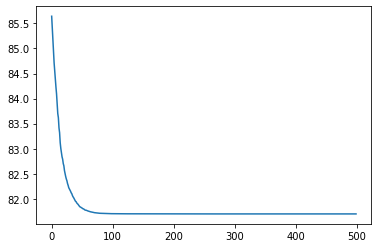

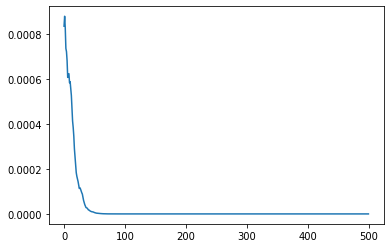

In [91]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

costs = []
variances = []
for i in range(50):
    c, v = es1plus1(MUTATION_VARIANCE, adaptive=True, desirable_success_rate=0.7)
    costs.append(c)
    variances.append(v)
    
costs = np.mean(costs, axis=0)
variances = np.mean(variances, axis=0)

plt.plot(costs)
plt.show()
plt.plot(variances)
plt.show()

# Corridor function

In [102]:
def corridor_function(x, b, c0, c1):
    if -b < x[1] < b:
        return c0 + c1 * x[0],
    else:
        return np.inf,

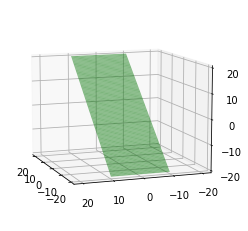

In [137]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
x, y = np.meshgrid(x, y)
xy = np.concatenate((x[..., None],y[..., None]), axis=2)
helper = lambda x: corridor_function(x, 10, 0, 1)
z = np.apply_along_axis(helper, 2, xy)
ax = plt.figure().add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z[..., 0], rstride=1, cstride=1, color='green', alpha=0.5)
ax.view_init(10, -200)
px.scatter_3d(x=x.flatten(), y=y.flatten(), z=z[..., 0].flatten()).show()

# ($\mu + \lambda$)-ES
Again, minimize 10-dimensional sphere function. It seems that 'intermediate global' child creation strategy makes algorithm to converge faster than others. But remember, that the optimum value of this objective function is [0,0,...0]. Since the population is initialized around this point, it is a) easier to find solution, it just needs to exploit, b) child creation is biased towards optimal solution. Because if we have two parents with values around 0 and we take mean of them, then their child will have values even closer to 0, definitely not further than any of them. It seems like cheating 

In [266]:
import random

class MuPlusLambdaES:
    def __init__(self, mu, lmbda, 
                 n_generations, n_simulations, 
                 recombination_strategy, mutation_variance,
                 shift_init=0):
        self.mu = mu
        self.lmbda = lmbda
        self.n_simulations = n_simulations
        self.n_generations = n_generations
        self.recombination_strategy = recombination_strategy
        self.mutation_variance = mutation_variance
        self.shift_init = shift_init
    
    def _init_pop(self):
        return np.random.randn(self.mu, 10) + self.shift_init
    
    def _mutate(self, ind):
        r = np.random.randn(10) * (self.mutation_variance ** 0.5)
        
        return ind + r
    
    def _make_child(self, pop):
        if self.recombination_strategy == 'discrete sexual':
            # randomly select two parents
            p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
            child = np.zeros_like(p1)
            # a mask where True values indicate indices which will go from p1 into the child
            # False - from p2 to the child
            mask = np.random.random(*child.shape).round().astype(bool)
            child[mask] = p1[mask]
            child[~mask] = p2[~mask]
        elif self.recombination_strategy == 'intermediate sexual':
            # randomly select two parents
            p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
            # element-wise mean of the two
            child = (p1 + p2) / 2
        elif self.recombination_strategy == 'discrete global':
            child = np.zeros_like(pop[0])
            # set each element of child to the corresponding element
            # of a randomly chosen parent
            for i in range(10):
                child[i] = pop[random.randint(0, len(pop) - 1)][i]
                
        elif self.recombination_strategy == 'intermediate global':
            child = np.zeros_like(pop[0])
            # set each element of child to the mean of corresponding elements
            # of two randomly chosen parents
            for i in range(10):
                p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
                child[i] = (p1[i] + p2[i]) / 2
        else:
            raise Exception(f"Unknown strategy: {self.recombination_stragety}")
            
        return self._mutate(child)
        
    def _make_children(self, pop):
        children = []
        for i in range(self.lmbda):
            children.append(self._make_child(pop))
            
        return np.array(children)
    
    def run_single(self):
        pop = self._init_pop()
        min_costs = []
        avg_costs = []
        
        for i in range(self.n_generations):
            children = self._make_children(pop)
            
            candidates = np.concatenate((pop, children), axis=0)
            fitnesses = np.apply_along_axis(sphere_function, 1, candidates)
            sorted_indices = np.argsort(fitnesses)[:self.mu]
            pop = candidates[sorted_indices]
            
            # log costs for evolution visualization
            min_costs.append(fitnesses.min())
            avg_costs.append(fitnesses[sorted_indices].mean())
            
        return np.array(min_costs), np.array(avg_costs), pop[0]
    
    def run_multiple(self):
        min_costs = []
        avg_costs = []
        bests = []
        for i in tqdm(range(self.n_simulations)):
            min_c, avg_c, best = self.run_single()
            min_costs.append(min_c)
            avg_costs.append(avg_c)
            bests.append(best)
           
        min_costs = np.mean(min_costs, axis=0)
        avg_costs = np.mean(avg_costs, axis=0)
        return min_costs, avg_costs, bests

  0%|          | 0/50 [00:00<?, ?it/s]

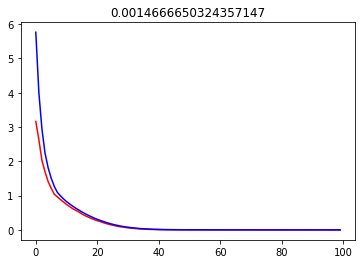

[array([-0.01642488,  0.02088312, -0.00228711, -0.00401495,  0.00690579,
        0.01325613,  0.00992327,  0.0056869 , -0.01472805, -0.00382251]), array([ 1.06149513e-02,  8.79807560e-05, -4.06032527e-03, -4.24128540e-03,
       -2.51043227e-02, -1.27585512e-02, -1.55035257e-02,  1.55304013e-02,
        3.68722868e-03,  1.51339036e-02]), array([ 0.00803398, -0.02151613,  0.00028773, -0.00578058, -0.02200968,
       -0.00828969, -0.00338735,  0.00165487,  0.00370802, -0.02059105]), array([-0.00096735,  0.01748102,  0.01132917, -0.00688886,  0.00310982,
       -0.00502703,  0.01044941,  0.01971392,  0.00551698, -0.01025093]), array([-0.01779483, -0.01340649,  0.01408117, -0.01819027,  0.01424018,
       -0.01918148, -0.00044467, -0.00858305,  0.0056133 ,  0.00286276]), array([ 1.00249845e-02,  2.42152032e-02,  3.29611774e-03,  3.42866826e-05,
        1.62268412e-02,  1.07505823e-02,  6.26854583e-03, -1.72139750e-03,
        7.39017381e-03, -4.68950179e-03]), array([ 0.00708819,  0.014464

In [240]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 100, 50, 'discrete sexual', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

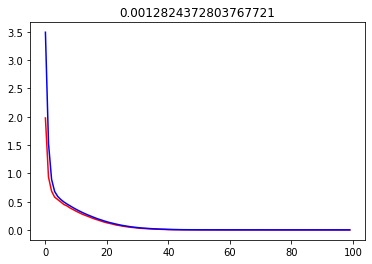

[array([-0.01058381, -0.00105448,  0.01158433, -0.00033099, -0.03328243,
       -0.00205715,  0.01244806, -0.00501531,  0.01300297, -0.01327418]), array([ 0.00387078,  0.01525426, -0.00084446,  0.01736934, -0.00489988,
       -0.00737806,  0.01725981,  0.00076622,  0.00909518, -0.0167765 ]), array([ 0.00092664, -0.00076377,  0.02454981,  0.00977323,  0.00104641,
        0.01389701, -0.01102143,  0.00605088,  0.01419619, -0.00135467]), array([ 0.00062433,  0.0183986 ,  0.00466973,  0.00500618,  0.00406846,
        0.00697701, -0.01000316,  0.00615105, -0.00656528,  0.02721917]), array([ 0.01108125,  0.01497274, -0.00854023, -0.01298233, -0.00182193,
       -0.01767394, -0.01797327,  0.00973664, -0.00263063,  0.00093824]), array([-0.01427235,  0.0213202 , -0.00596541,  0.00636363,  0.00651502,
        0.01519613,  0.02128737,  0.00621826, -0.00612855, -0.01324751]), array([ 0.00509949, -0.01473931,  0.00038569, -0.02039043,  0.00239572,
        0.00373325, -0.00313031,  0.01235184,  0.01

In [241]:
es = MuPlusLambdaES(10, 20, 100, 50, 'intermediate sexual', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

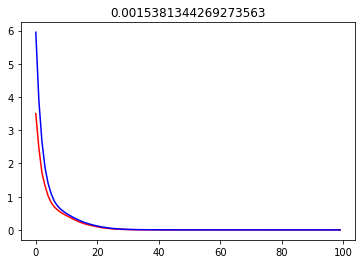

[array([ 0.01976305,  0.0051846 ,  0.01032773, -0.01198347, -0.00262115,
       -0.00763138, -0.02089573,  0.02418904, -0.01010424,  0.01134728]), array([-0.00728484,  0.00117802, -0.01196618, -0.01903976,  0.00951062,
       -0.00630356, -0.00473427, -0.00202794, -0.01587932, -0.00975627]), array([ 0.00411063, -0.00915944, -0.00540267,  0.02281327,  0.02143611,
        0.02064346, -0.02155507,  0.00772569, -0.00198309, -0.0021907 ]), array([ 0.01177343, -0.00869681,  0.01504628, -0.00877588, -0.02325474,
        0.00679134,  0.00252025,  0.00698223,  0.00722642,  0.02413792]), array([ 0.01710065,  0.01074183,  0.01552662, -0.01857643, -0.00045349,
       -0.00059197, -0.00687943, -0.00869899, -0.01895609,  0.01652717]), array([ 0.010372  ,  0.00250401, -0.01149326,  0.01575991, -0.00169097,
       -0.01375264,  0.00627909, -0.0175496 ,  0.01104486, -0.01775814]), array([-0.01142344,  0.01208607, -0.00385422,  0.00265127,  0.00363486,
        0.01156498,  0.00531495,  0.02389845, -0.00

In [242]:
es = MuPlusLambdaES(10, 20, 100, 50, 'discrete global', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

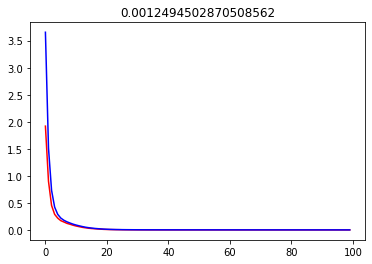

[array([-0.00857426, -0.00065631, -0.003741  , -0.01144901, -0.01334469,
        0.01096425, -0.00714789, -0.00055784,  0.00168173,  0.00077644]), array([-0.02086803,  0.00456981,  0.00076913, -0.00707894,  0.00813667,
        0.00086479, -0.01271165, -0.01824596, -0.01494867, -0.01187656]), array([-0.017745  ,  0.00264521, -0.01663673,  0.00729259,  0.01240593,
       -0.00711733, -0.00324582, -0.00679522,  0.00809648, -0.01446462]), array([-0.00455675,  0.00741994, -0.01405628, -0.01674626, -0.00544191,
       -0.01476426, -0.01013671, -0.01139006,  0.01213187, -0.01391565]), array([ 0.00174459, -0.02031828,  0.00812531, -0.00311906,  0.00648461,
        0.00225471,  0.01102717, -0.00793152, -0.00517127, -0.01893545]), array([ 0.01628803,  0.01223786,  0.00272866,  0.00629724, -0.00565045,
       -0.00493375, -0.01269055, -0.01771931, -0.00336552, -0.00512249]), array([ 0.01230265,  0.00646075,  0.00248923,  0.00732391, -0.02029201,
        0.01000711,  0.00268876, -0.00663713, -0.00

In [243]:
es = MuPlusLambdaES(10, 20, 100, 50, 'intermediate global', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

Here I set optimum point to [3,3,...,3]. If we initialize population around this point, then it converges very fast. But if we initialize population around origin, it needs much more time to go to the optimal point. Moreover, now discrete strategy performs much better than intermediate because creation of children is no more biased towards the center of population. It is important because the population needs to shift itself.

In [260]:
def sphere_function(x, rng=(-5.12, 5.12)):
    a = 3
    
    if np.any((rng[0] + a > x) | (x > rng[1] + a)):
        # x is out of range - return infitinity cost
        return np.inf
    else:
        return np.sum((x-a)**2)

  0%|          | 0/50 [00:00<?, ?it/s]

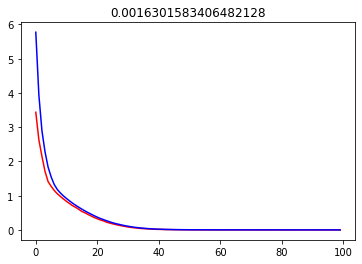

[array([2.9999063 , 3.02586321, 3.0104738 , 2.97905654, 3.008283  ,
       3.01819295, 2.99321627, 2.99815265, 2.97890361, 3.00305018]), array([3.00375876, 2.9976476 , 2.99456602, 2.98939007, 2.99453381,
       3.00640722, 3.01390291, 2.98439254, 3.02714326, 3.00836784]), array([3.01097056, 2.98330992, 2.97921403, 2.99360586, 3.01387816,
       2.99519673, 3.00250135, 3.00605825, 2.98649943, 2.9941509 ]), array([2.99380666, 3.003646  , 2.98533317, 3.01245332, 2.99619261,
       3.01104854, 3.0121475 , 2.98193532, 2.98718861, 2.97249922]), array([2.99658804, 3.02622918, 3.00940806, 2.99508157, 3.01158037,
       2.98923163, 2.98386363, 3.0043708 , 2.99487391, 2.97741863]), array([3.00902975, 3.00284812, 3.0118177 , 3.0053214 , 2.98458194,
       3.00677726, 2.99467009, 2.97937537, 2.99324723, 2.99846073]), array([3.01333647, 2.98923203, 2.98738523, 2.99640343, 3.01219503,
       2.97533921, 2.98676814, 3.00219643, 3.01242117, 2.97753308]), array([3.01001876, 3.01225298, 2.99509367, 3.01

In [267]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 100, 50, 'discrete sexual', MUTATION_VARIANCE, shift_init=3)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

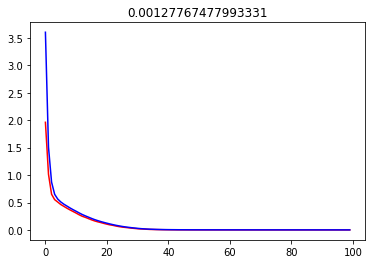

[array([2.9821023 , 2.99932963, 2.99805211, 3.00598906, 2.99959804,
       2.99974345, 2.98832391, 3.00281252, 3.00632876, 3.02744334]), array([2.99314554, 2.99330408, 3.01054772, 2.96886573, 2.98349304,
       2.99874953, 3.00720022, 3.01529947, 3.00210725, 2.99403318]), array([3.00528162, 3.01318784, 3.00875863, 3.00481066, 3.00869742,
       3.00111998, 2.98879913, 2.99368616, 2.99978287, 2.99704284]), array([2.98794386, 2.9889534 , 2.99998365, 2.99344821, 2.98847578,
       2.98483976, 2.99829318, 2.99159764, 3.00412367, 2.97789827]), array([3.00630397, 3.00361532, 2.99320276, 2.99564711, 2.99244564,
       3.00422829, 3.00279054, 2.99414691, 2.993616  , 3.01300036]), array([3.01512968, 2.99870508, 2.99920661, 2.98002265, 3.00948061,
       3.0000052 , 2.99814952, 2.98467185, 2.9946307 , 2.99386826]), array([3.00723899, 3.02229107, 2.99762507, 2.98732071, 2.97841513,
       2.99197953, 2.99528544, 2.9938916 , 3.00181767, 2.99902396]), array([2.99021365, 2.99945461, 3.00757354, 3.01

In [268]:
es = MuPlusLambdaES(10, 20, 100, 50, 'intermediate sexual', MUTATION_VARIANCE, shift_init=3)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

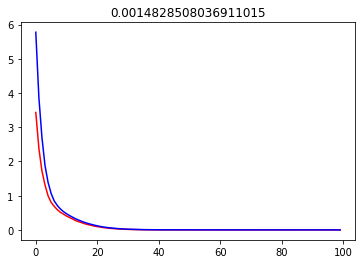

[array([2.98049967, 2.99925274, 2.98365227, 3.00384056, 2.99600811,
       2.98492113, 3.0117015 , 3.01130898, 3.01108302, 2.99700857]), array([3.01375102, 3.00265988, 2.99657379, 2.99102786, 2.99980373,
       3.00423545, 3.03491417, 2.98956517, 3.00347665, 2.98895898]), array([2.97623413, 3.00564711, 3.00774106, 2.99636688, 3.0229563 ,
       2.98383452, 3.0046527 , 3.00530231, 3.02459426, 3.01894025]), array([3.01765038, 2.98924001, 3.00355743, 2.9922159 , 2.98615171,
       3.02472518, 3.01225375, 3.00856503, 3.00016358, 2.9930991 ]), array([3.03059145, 3.00937507, 3.00441077, 3.00181182, 2.98716804,
       3.00412176, 3.00264049, 2.99116238, 2.98008763, 3.00112749]), array([2.98319429, 2.99564112, 3.005359  , 3.00067714, 2.99798669,
       3.00065502, 2.97149404, 3.00866388, 2.99162849, 3.01142396]), array([3.00037083, 3.01691267, 2.99175825, 2.97752346, 3.01689487,
       2.99793106, 3.01190652, 3.01337698, 2.99378943, 3.00638226]), array([3.01401538, 2.99149405, 3.01139757, 3.02

In [269]:
es = MuPlusLambdaES(10, 20, 100, 50, 'discrete global', MUTATION_VARIANCE, shift_init=3)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

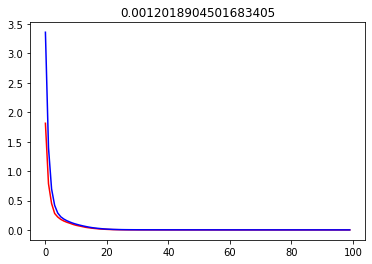

[array([3.00329747, 3.00344585, 3.00573449, 3.00108117, 2.99310161,
       2.99680576, 2.98321473, 3.01711711, 3.02371154, 2.99023972]), array([3.00463956, 3.00691681, 3.00015372, 2.9871056 , 3.0043726 ,
       3.01022841, 2.99588772, 2.98135345, 2.99697094, 3.0028571 ]), array([3.00616164, 2.99975715, 2.99133964, 2.99016609, 2.99228729,
       3.0079535 , 3.00648858, 2.99918822, 3.0273191 , 3.00954984]), array([2.99417426, 3.00702794, 2.98239144, 3.0150075 , 3.0031098 ,
       3.01421651, 2.99309862, 2.99267975, 3.0104698 , 3.00230967]), array([2.98056588, 2.99850333, 3.01970091, 3.00696192, 2.98475972,
       3.00965275, 2.99589149, 2.988169  , 2.99081274, 2.98971927]), array([3.01835078, 2.99153932, 3.00798687, 3.01092684, 3.00357355,
       2.98758663, 2.9954255 , 3.0177199 , 2.9956728 , 3.00614638]), array([2.9980012 , 3.00503047, 2.98365267, 3.00691127, 2.99480427,
       2.99598261, 2.98168053, 2.9896092 , 2.98028457, 2.99635008]), array([2.98432001, 3.00426934, 3.00322688, 3.00

In [270]:
es = MuPlusLambdaES(10, 20, 100, 50, 'intermediate global', MUTATION_VARIANCE, shift_init=3)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

Initialize around origin

  0%|          | 0/50 [00:00<?, ?it/s]

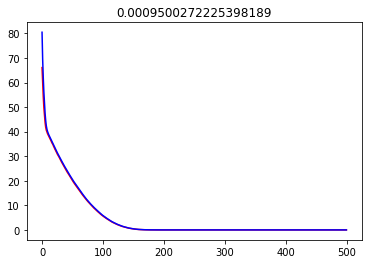

[array([3.00751943, 3.0011881 , 2.99535872, 2.99600963, 3.00163952,
       2.98692656, 3.00860617, 2.98357193, 3.01312531, 3.00848727]), array([2.99248798, 3.01084682, 2.9974027 , 3.00413811, 3.00101594,
       2.99738465, 2.98455562, 3.00871871, 3.02152405, 3.00917797]), array([3.01429903, 3.0002932 , 3.0099107 , 3.01369309, 3.00973491,
       3.00120696, 3.02338212, 2.99976538, 3.00998407, 3.0010922 ]), array([2.98431757, 2.99843206, 3.0025739 , 3.00568498, 2.98372652,
       3.00231296, 3.00147809, 2.99546829, 2.99895007, 2.99688568]), array([3.00346592, 2.99675852, 2.98890517, 2.99090798, 2.98475101,
       3.01184065, 3.00144654, 3.00498496, 3.00530372, 3.00163993]), array([3.01421783, 3.00801747, 3.00120294, 3.00812747, 2.99857625,
       3.00178225, 2.99680914, 2.98926289, 3.00073672, 2.9752669 ]), array([2.98292916, 3.00001821, 3.00084866, 2.99912222, 3.00373521,
       2.99617198, 2.99866687, 3.00129073, 2.97377957, 2.9994025 ]), array([2.99377683, 2.9978283 , 3.00287388, 2.99

In [271]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 'discrete sexual', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

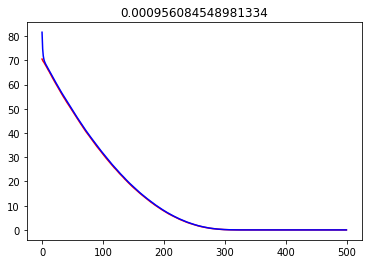

[array([2.9791567 , 2.99939061, 2.99988051, 2.99778521, 3.00593227,
       2.99005324, 2.99574454, 3.00791998, 3.01640136, 3.00667551]), array([2.99731852, 2.99358482, 3.01414911, 2.99524085, 2.99675615,
       3.02020665, 3.00524752, 3.0044603 , 3.00660217, 2.98607887]), array([3.01357312, 3.01153469, 3.01286191, 3.00349233, 2.99689865,
       3.01710931, 3.00410155, 3.01533797, 3.00448212, 3.00196988]), array([3.0038917 , 3.02134032, 2.9966616 , 2.99359289, 3.00798781,
       3.00895859, 2.9936074 , 3.01954062, 2.99797798, 2.97934066]), array([3.00641887, 3.0195753 , 3.01366504, 2.9974601 , 3.00069002,
       3.00218524, 2.99149865, 2.99229213, 2.99727343, 2.98304569]), array([3.01122679, 2.99301138, 2.99200803, 3.0067446 , 3.00193262,
       2.99575792, 3.00361997, 3.0144634 , 3.00746437, 2.98997664]), array([3.0095754 , 3.00070882, 3.00530092, 3.00691672, 3.01292876,
       3.00394653, 3.00784637, 2.99876013, 2.98309728, 3.01206518]), array([2.99770912, 3.01506162, 3.00745283, 3.00

In [272]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 'intermediate sexual', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

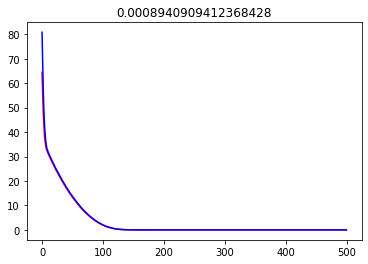

[array([3.00743181, 3.00270162, 3.01952119, 3.00292077, 3.00218005,
       2.99316364, 3.00465936, 3.01009031, 2.98219924, 3.00567971]), array([3.00667293, 3.00691722, 3.0010313 , 2.99410151, 3.00989618,
       3.00407973, 2.991212  , 2.99990469, 2.99867821, 2.99130218]), array([3.00291292, 2.98309284, 2.99094999, 3.0128487 , 3.00961166,
       3.0085021 , 2.98040883, 2.99623806, 3.0005455 , 3.00040835]), array([3.00601284, 3.01129663, 3.00703274, 2.98666567, 3.00557199,
       2.99621046, 2.98814846, 3.01406266, 2.97952332, 2.98487323]), array([3.0153146 , 2.99431499, 2.99093233, 3.01096301, 2.99697359,
       2.99985087, 3.00805866, 3.01008919, 3.00016717, 2.98403163]), array([2.99034712, 2.98884244, 3.01637982, 2.99757292, 2.99580035,
       3.00092731, 3.00919718, 3.00641976, 3.01172508, 3.00057152]), array([2.98615847, 3.00614695, 3.00415737, 3.01113606, 3.00604174,
       2.98768379, 3.00975134, 2.99075887, 2.98885548, 2.99954608]), array([3.0051542 , 2.99140238, 2.99694712, 3.01

In [273]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 'discrete global', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

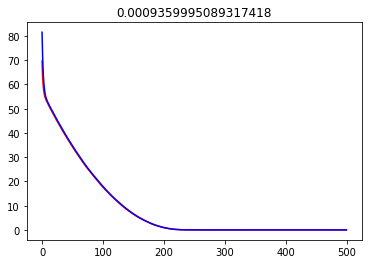

[array([3.00045713, 3.00507823, 2.99317311, 2.98918063, 2.99248493,
       3.01328061, 2.99034561, 2.99940624, 3.00023208, 2.99412661]), array([2.99299492, 3.00093742, 3.00088221, 2.9894738 , 2.99513492,
       2.97776765, 3.01168931, 2.99932101, 2.9879183 , 3.01677523]), array([2.98911813, 3.02059489, 3.00209458, 3.00147498, 2.9779304 ,
       2.99885261, 3.00719801, 3.00772846, 2.99495072, 3.00300143]), array([2.9834654 , 3.00263271, 2.98641392, 2.98744792, 2.98939767,
       3.00234098, 3.00298574, 2.99389911, 2.98660057, 3.01065713]), array([3.01404691, 3.00095782, 2.99919141, 2.97938205, 2.99966661,
       3.00504308, 2.991708  , 3.00708884, 2.9888007 , 3.00562508]), array([3.00548358, 2.99086695, 3.02110251, 2.99250078, 2.99980836,
       2.99545087, 3.00967748, 2.99322013, 2.99492883, 3.01304235]), array([2.99072715, 3.00949745, 2.98191814, 3.00531431, 2.98570726,
       3.00720817, 2.99729715, 3.0003802 , 3.00703175, 2.99943419]), array([3.00774946, 2.99041193, 3.02022317, 3.00

In [274]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 'intermediate global', MUTATION_VARIANCE)
min_costs, avg_costs, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
print(bests)

### ES with Self-Adaptation

In [360]:
import random

class MuPlusLambdaES:
    def __init__(self, mu, lmbda, 
                 n_generations, n_simulations, n_dims,
                 recombination_strategy, mutation_variance,
                 shift_init=0,
                 p1=1, p2=1):
        self.mu = mu
        self.lmbda = lmbda
        self.n_simulations = n_simulations
        self.n_generations = n_generations
        self.n_dims = n_dims
        self.recombination_strategy = recombination_strategy
        self.mutation_variance = mutation_variance
        self.shift_init = shift_init
        self.tau0 = p1 / np.sqrt(2*np.sqrt(self.n_dims))
        self.taui = p2 / np.sqrt(2*self.n_dims)
                
        self.mean_sigmas = []
    
    def _init_pop(self):
        ind = np.random.randn(self.mu, self.n_dims) + self.shift_init
        sigmas = np.ones((self.mu, self.n_dims)) * self.mutation_variance
        ind = np.concatenate((ind, sigmas), axis=1)
            
        return ind
    
    def _mutate(self, ind):
        rho0 = np.random.randn(1)
        rhoi = np.random.randn(self.n_dims)
        
#         print(np.exp(self.tau0 * rho0 + self.taui * rhoi))
        sigmas = ind[self.n_dims:] * np.exp(self.tau0 * rho0 + self.taui * rhoi)
        # log mean of sigmas for evolution visualization
        self.mean_sigmas.append(np.mean(sigmas))
#         self.mean_sigmas.append(np.exp(self.tau0 * rho0 + self.taui * rhoi).mean())
        r = np.random.randn(self.n_dims) * sigmas
        
        return np.concatenate((ind[:self.n_dims] + r, sigmas), axis=0)
    
    def _make_child(self, pop):
        if self.recombination_strategy == 'discrete sexual':
            # randomly select two parents
            p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
            child = np.zeros_like(p1)
            # a mask where True values indicate indices which will go from p1 into the child
            # False - from p2 to the child
            mask = np.random.random(*child.shape).round().astype(bool)
            child[mask] = p1[mask]
            child[~mask] = p2[~mask]
        elif self.recombination_strategy == 'intermediate sexual':
            # randomly select two parents
            p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
            # element-wise mean of the two
            child = (p1 + p2) / 2
        elif self.recombination_strategy == 'discrete global':
            child = np.zeros_like(pop[0])
            # set each element of child to the corresponding element
            # of a randomly chosen parent
            for i in range(len(child)):
                child[i] = pop[random.randint(0, len(pop) - 1)][i]
                
        elif self.recombination_strategy == 'intermediate global':
            child = np.zeros_like(pop[0])
            # set each element of child to the mean of corresponding elements
            # of two randomly chosen parents
            for i in range(len(child)):
                p1, p2 = pop[random.randint(0, len(pop) - 1)], pop[random.randint(0, len(pop) - 1)]
                child[i] = (p1[i] + p2[i]) / 2
        else:
            raise Exception(f"Unknown strategy: {self.recombination_stragety}")
            
        return self._mutate(child)
        
    def _make_children(self, pop):
        children = []
        for i in range(self.lmbda):
            children.append(self._make_child(pop))
            
        return np.array(children)
    
    def run_single(self):
        pop = self._init_pop()
        min_costs = []
        avg_costs = []
        self.mean_sigmas = []
        
        for i in range(self.n_generations):
            children = self._make_children(pop)
            
            candidates = np.concatenate((pop, children), axis=0)
            fitnesses = np.apply_along_axis(sphere_function, 1, candidates[:, :self.n_dims])
            sorted_indices = np.argsort(fitnesses)[:self.mu]
            pop = candidates[sorted_indices]
            
            # log costs for evolution visualization
            min_costs.append(fitnesses.min())
            avg_costs.append(fitnesses[sorted_indices].mean())
            
        return np.array(min_costs), np.array(avg_costs), np.array(self.mean_sigmas), pop[0]
    
    def run_multiple(self):
        min_costs = []
        avg_costs = []
        bests = []
        mean_sigmas = []
        for i in tqdm(range(self.n_simulations)):
            min_c, avg_c, mean_s, best = self.run_single()
            min_costs.append(min_c)
            avg_costs.append(avg_c)
            bests.append(best)
            mean_sigmas.append(mean_s)
           
        min_costs = np.mean(min_costs, axis=0)
        avg_costs = np.mean(avg_costs, axis=0)
        mean_sigmas = np.mean(mean_sigmas, axis=0)
        return min_costs, avg_costs, mean_sigmas, bests

When we do mutation variance adaptation, we see that:
* Sexual performs better than global
* Intermediate performs better than discrete
both in terms of cost value and convergence rate.
Why intermediate is better? Probably because at some point we need to start to decrease values of mutation variance. When we do intermediate, we take mean of two parents' values. The result will always be less than the greater value of two parents. Therefore, every crossover will decrease values of mutation variance. In contrast, in discrete we take a value without changing it. Therefore, decrease of mutation variances will be much slower and we'll need more time to go to the exploitation stage. Similar reasoning in terms of lower of two values.

From the graphs we can see that intermediate has a greater peak of mutation variance values, so it explores much more efficiently. After that, it has a rapid decay, so it goes to the exploitation stage much faster.

  0%|          | 0/50 [00:00<?, ?it/s]

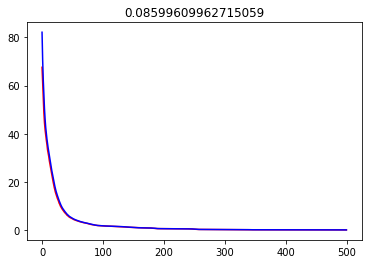

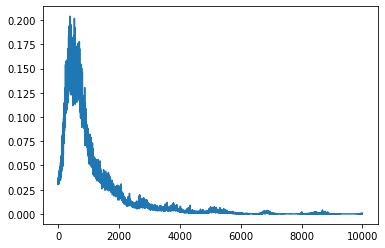

[array([2.99999949e+00, 3.00000000e+00, 3.00000000e+00, 2.99999996e+00,
       3.00000000e+00, 2.99999999e+00, 3.00000000e+00, 3.00000003e+00,
       3.00000000e+00, 2.99999998e+00, 1.85798530e-12, 7.10929727e-10,
       1.37541582e-08, 4.72168236e-08, 2.29929856e-08, 4.88444960e-09,
       1.74473851e-09, 2.08256848e-09, 3.84072149e-08, 1.35374241e-09]), array([3.00000004e+00, 2.99999988e+00, 3.00000046e+00, 2.99999998e+00,
       2.99999635e+00, 3.00000010e+00, 3.00000176e+00, 3.00000049e+00,
       2.99999829e+00, 2.99999973e+00, 1.88025702e-08, 9.80781399e-09,
       2.53255298e-07, 2.66349417e-08, 6.50238836e-11, 3.19350444e-08,
       1.09284174e-09, 1.70138873e-11, 1.59437620e-07, 1.37061803e-07]), array([3.00000142e+00, 3.00000195e+00, 2.99999796e+00, 3.00000078e+00,
       3.00015921e+00, 3.00002431e+00, 3.00000299e+00, 3.00000465e+00,
       3.00000016e+00, 2.99998610e+00, 1.62247228e-07, 2.74154088e-09,
       9.81417600e-08, 3.53191462e-06, 2.67753373e-10, 7.49737668e-09,
 

In [361]:
MUTATION_VARIANCE = 0.1 / (2 * 3**0.5)

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'discrete sexual', MUTATION_VARIANCE)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
plt.plot(mean_sigmas)
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

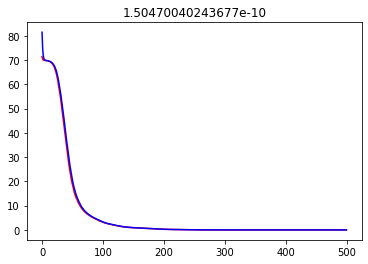

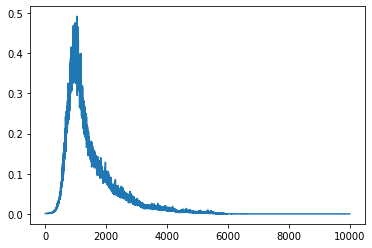

[array([3.00000000e+00, 3.00000000e+00, 3.00000001e+00, 3.00000000e+00,
       3.00000001e+00, 3.00000002e+00, 3.00000001e+00, 2.99999998e+00,
       3.00000001e+00, 3.00000001e+00, 5.18599632e-09, 1.62215752e-08,
       8.17021172e-09, 1.27285020e-08, 7.20272914e-09, 5.68768887e-09,
       2.20526586e-09, 5.41428648e-09, 6.31401194e-09, 8.72456851e-09]), array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 1.10237529e-10, 7.43625909e-11,
       1.78675836e-10, 9.43981733e-11, 1.49874314e-10, 4.93998094e-11,
       7.05961819e-11, 6.72938319e-11, 1.59905976e-10, 8.74370603e-11]), array([3.00000000e+00, 3.00000002e+00, 3.00000000e+00, 3.00000000e+00,
       2.99999996e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       2.99999999e+00, 3.00000000e+00, 5.37760629e-10, 4.36702999e-10,
       2.50641546e-10, 9.81231129e-10, 6.18486433e-10, 2.69037496e-09,
 

In [362]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'intermediate sexual', MUTATION_VARIANCE)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
plt.plot(mean_sigmas)
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

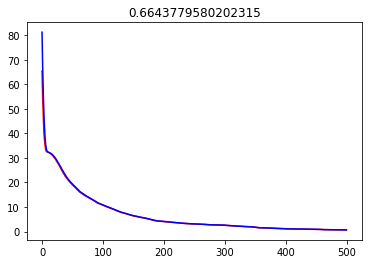

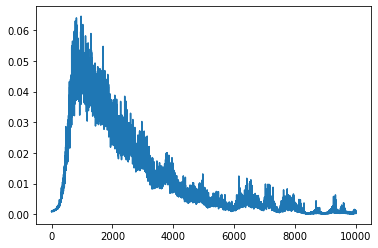

[array([3.00000374e+00, 3.00000001e+00, 3.00000007e+00, 3.00000001e+00,
       3.00000019e+00, 2.99999985e+00, 2.99991050e+00, 2.99999991e+00,
       2.99999875e+00, 3.00000033e+00, 2.66527792e-10, 6.65207733e-09,
       2.67532483e-07, 1.05049179e-07, 1.25235558e-08, 1.72613589e-09,
       1.75661687e-10, 6.04839554e-08, 1.17535428e-09, 7.04062832e-11]), array([3.00000074e+00, 3.00000078e+00, 2.99999743e+00, 3.00000021e+00,
       3.00000002e+00, 3.00000254e+00, 6.75911423e-01, 2.99999871e+00,
       2.99999981e+00, 3.00000055e+00, 3.79348591e-08, 9.04306339e-07,
       2.13166792e-08, 8.59092370e-07, 2.15742795e-06, 3.51748755e-08,
       1.01729671e-16, 1.75768894e-06, 2.93900973e-07, 3.95746927e-07]), array([3.00795428e+00, 3.00000028e+00, 3.00000355e+00, 2.99999805e+00,
       2.99999661e+00, 3.00000530e+00, 2.99999791e+00, 2.99999952e+00,
       2.99999946e+00, 2.99999686e+00, 2.57856065e-08, 7.81556956e-09,
       4.22274914e-07, 6.27404558e-07, 1.52300291e-06, 1.31977875e-07,
 

In [363]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'discrete global', MUTATION_VARIANCE)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
plt.plot(mean_sigmas)
plt.show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

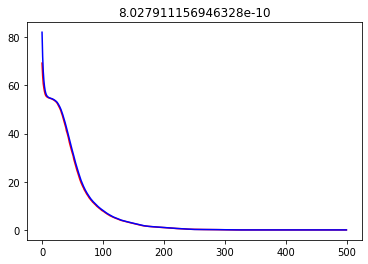

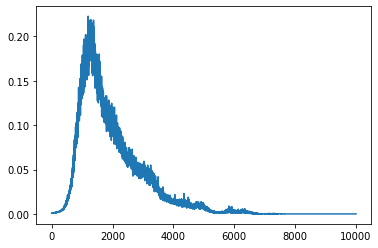

[array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 2.52917846e-12, 2.92108833e-12,
       9.09361963e-13, 1.54877052e-12, 6.99126855e-13, 2.25934538e-12,
       2.97543647e-12, 5.22199175e-12, 7.86827128e-12, 2.78683432e-12]), array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 9.01291085e-17, 8.85090322e-17,
       2.26045984e-17, 1.48475361e-16, 2.61593983e-16, 7.93122859e-17,
       1.89453557e-17, 3.15536924e-16, 4.65187843e-16, 2.09716486e-16]), array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 7.77380799e-17, 2.37198169e-16,
       2.42484352e-16, 6.19806783e-16, 1.20466751e-16, 4.89176454e-16,
 

In [364]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'intermediate global', MUTATION_VARIANCE)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
plt.plot(mean_sigmas)
plt.show()
print(bests)

with too big values for p1 and p2 we get too big exponential factor - such individuals probably live only for a single generation because next mutation will throw them far out of the range.
Too small values for p1 and p2 - sigmas almost do not change, so there is no evolution of these values.

  0%|          | 0/50 [00:00<?, ?it/s]

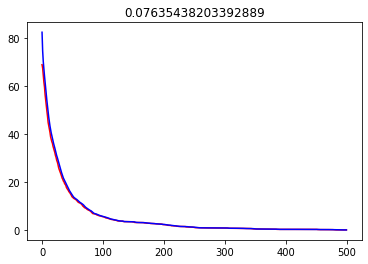

[array([2.99999946e+00, 3.00000004e+00, 2.99999935e+00, 3.00000036e+00,
       3.00000343e+00, 2.99999891e+00, 2.99947755e+00, 2.99999401e+00,
       3.00000019e+00, 3.00000068e+00, 1.65677182e-14, 2.22056827e-06,
       2.68675125e-10, 6.33139663e-08, 1.15125289e-11, 1.53087626e-08,
       5.10692482e-18, 2.01390859e-16, 3.14517987e-12, 1.56762236e-10]), array([2.99999985e+00, 2.99999999e+00, 3.00000019e+00, 3.00000008e+00,
       2.99999951e+00, 2.94816364e+00, 3.00000001e+00, 3.00000011e+00,
       2.99999987e+00, 3.03706334e+00, 4.60606238e-11, 3.55828369e-16,
       2.62677033e-07, 9.85930160e-08, 2.16988326e-09, 7.61979218e-27,
       2.85079098e-13, 1.77287658e-12, 1.50448299e-12, 1.27229327e-45]), array([3.00006204e+00, 2.99994832e+00, 3.00000546e+00, 3.00009960e+00,
       2.99995769e+00, 3.00010499e+00, 2.99994409e+00, 2.99892366e+00,
       2.99994778e+00, 2.99996558e+00, 1.12963092e-05, 1.97980956e-08,
       7.39151736e-09, 7.35249563e-07, 1.78207777e-04, 2.14873988e-04,
 

In [354]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'intermediate sexual', MUTATION_VARIANCE, p1=10, p2=10)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
# plt.plot(mean_sigmas)
# plt.show()
px.line(x=np.arange(len(mean_sigmas)), y=mean_sigmas).show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

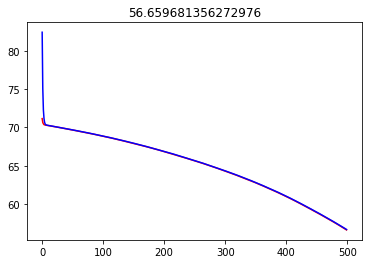

[array([ 1.05352536e+00, -6.81544487e-01,  1.02548834e+00,  3.82944500e-01,
        1.02911445e+00,  1.62023699e+00,  5.31142287e-01,  7.61776413e-01,
        9.45538419e-01,  1.03680072e+00,  1.37434620e-03,  1.57933975e-03,
        1.59117587e-03,  1.48033180e-03,  1.01450956e-03,  2.16476706e-03,
        1.18569331e-03,  1.72058169e-03,  1.80090044e-03,  1.84734421e-03]), array([ 0.54713761, -0.58602955,  0.9324752 , -0.43831085,  0.32705562,
        0.56800671,  0.5414862 , -0.20856359,  0.2725546 ,  0.8261241 ,
        0.00142716,  0.00190055,  0.00161587,  0.00233957,  0.00187834,
        0.00245033,  0.00111668,  0.00177377,  0.00194473,  0.00167789]), array([0.14152219, 0.89124405, 0.47237416, 1.24150195, 1.18766324,
       0.15883175, 1.32039324, 0.61285411, 0.16691499, 0.74707234,
       0.00407496, 0.00474178, 0.00782784, 0.00855576, 0.00669277,
       0.00395473, 0.00647629, 0.00399148, 0.0060373 , 0.00548538]), array([ 0.92053263,  0.067423  ,  1.02360428,  0.82684535,  1.

In [355]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'intermediate sexual', MUTATION_VARIANCE, p1=0.1, p2=0.1)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
# plt.plot(mean_sigmas)
# plt.show()
px.line(x=np.arange(len(mean_sigmas)), y=mean_sigmas).show()
print(bests)

  0%|          | 0/50 [00:00<?, ?it/s]

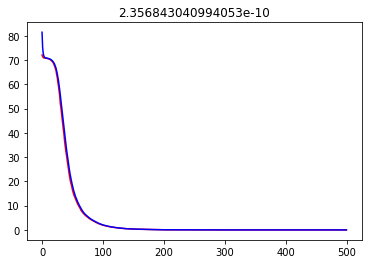

[array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000004e+00, 3.00000000e+00,
       3.00000001e+00, 3.00000000e+00, 6.90982662e-10, 8.26475480e-10,
       3.21138759e-10, 3.46604051e-09, 9.01660699e-10, 1.65849580e-11,
       7.09472396e-11, 1.96384937e-09, 2.32433655e-10, 1.63887964e-09]), array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 4.39676406e-10, 1.64383455e-10,
       9.97754092e-10, 3.35988819e-10, 6.59687810e-10, 2.94330471e-10,
       5.31101516e-10, 8.10781287e-10, 6.95609983e-10, 4.21221039e-10]), array([3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 3.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 4.64981029e-11, 1.65194363e-11,
       1.83111889e-10, 6.64113893e-11, 9.54200685e-11, 1.44529714e-10,
 

In [356]:
MUTATION_VARIANCE = (0.1 / (2 * 3**0.5))**2

es = MuPlusLambdaES(10, 20, 500, 50, 10, 'intermediate sexual', MUTATION_VARIANCE, p1=1, p2=1)
min_costs, avg_costs, mean_sigmas, bests = es.run_multiple()
plt.title(str(min_costs[-1]))
plt.plot(min_costs, color='red')
plt.plot(avg_costs, color='blue')
plt.show()
# plt.plot(mean_sigmas)
# plt.show()
px.line(x=np.arange(len(mean_sigmas)), y=mean_sigmas).show()
print(bests)